# LSC Communications Survey

I've taken the results of the communications survey and done some very basic charting and looking at them. If there are any other stat nerds/coders who want to poke around in this data you should be able to replicate using the below. I did all the work here straight from a csv download from the [main google sheet site](https://docs.google.com/spreadsheets/d/1ROJwgS1l-O1ei2UYDKckRkQZmVdOFDNEKWQSgOTGrn8/edit?usp=sharing). Here are some interesting things I think we see in the responses:

1. In spite of getting 172 responses we only received **3** on the non-english section (2 spanish, 1 polish).
1. We got lots of emails for followup data, over 100, so that's a good area of focus.
1. Email is definitely the strongest method, and it's consistent across grades.
1. People don't really like Social Media much for school use... which sort of surprised me actually.

My guess is part of what we're seeing is that people really like the value they get from the current Email approach, which seems like a good thing to me.

Stray observations from the raw packet:

1. We got lots of 7th grade responses, but they pretty consistently didn't follow the directions. See the summary data for more.
2. Lots of people don't like to read instructions... there are more than a few oddballs in the responses.

I was hoping we'd have a lot more non-english responses to see if we could draw any conclusions across those populations, but alas we did not. In looking at the CPS data for Thorp from the end of last year we had 89 bilingual students, or 10.58%. With ~170 surveys, assuming a random sample (which is obviously a bad assumption in this case), 3 is way low but I'm not sure whether that means we just systematically failed to engage those groups or if there just aren't many families that prefer to use non-english in this sort of situation. I think that's something we should follow up on in the detailed surveys, eg:

1. Do you speak another language at home?
1. Would you prefer to see translated communications?

Last note... for those of you who aren't code folks, you can ignore any of the fields beginning with "In".

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [83]:
raw = open('Downloads/LSC Communications Survey Results - Raw Data.csv')
data = pd.read_csv(raw)

### Basic Stats

This is a simple set of stats from the raw data. The count table is useful for looking at who we saw responses from. Notice that when split at the grade level our sample sizes get pretty teeny for some of them and that shows up in the split histograms below. The standout I think is the 7th grade responses. In spite of them being somewhat inconsistent in reading the instructions I think it really shows how much value you get from the teachers being part of the process here. They had a table setup for the surveys and were making sure they got filled out. Next time we do one of these, making sure the teachers are aware and educated on the instructions and the point would seem to make a big difference in response and quality. The other interesting thing to note below is that on average the Website and SMS look pretty similar in terms of desirability, though as you can see from the charts below there's a lot less consistency across grades.

In [84]:
data.describe()

,ID,Website,E-Mail,Paper,Social Media,SMS Text,In Spanish?,In Polish?,Kindergarten,1st,2nd,3rd,4th,5th,6th,7th,8th
count,171.000000,91.000000,157.000000,88.000000,78.000000,89.000000,2,1,25,20,15,29,19,38,12,47,10
mean,86.538012,2.884615,1.347134,3.056818,3.961538,2.831461,1,1,1,1,1,1,1,1,1,1,1
std,49.939994,1.229446,0.758842,1.371784,1.164321,1.292337,0,NaN,0,0,0,0,0,0,0,0,0
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1,1,1,1,1,1,1,1,1,1,1
25%,43.500000,2.000000,1.000000,2.000000,3.000000,2.000000,1,1,1,1,1,1,1,1,1,1,1
50%,87.000000,3.000000,1.000000,3.000000,4.000000,3.000000,1,1,1,1,1,1,1,1,1,1,1
75%,129.500000,4.000000,1.500000,4.000000,5.000000,4.000000,1,1,1,1,1,1,1,1,1,1,1
max,172.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1,1,1,1,1,1,1,1,1,1,1


### Some histograms

Below are the main charts. The first is a summary set of histograms across all the data. It's interesting to me to see that the two biggest standouts are E-Mail on the positive side, and Social Media on the negative. All the others are sort of all over the place in terms of response. I'm not sure whether to take from this something about desirability, or whether it's a response to the current effectiveness of the Friday letter versus the other possibilities.

After the summary histograms I've shown them split by grade level. Email is again super consistent, but the others all get a bit more wonky. There seem to be some per-grade effects, maybe, but I think our samples are too small to draw any really meaningful conclusions there.

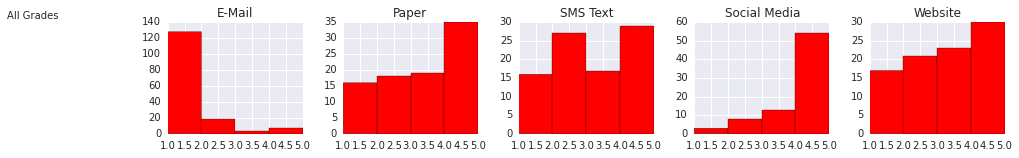

In [85]:
y = data[["Website","E-Mail","Paper","Social Media",'SMS Text']]
plt.figure()
y.hist(bins=4, layout = (1,5), figsize=(15, 2), color="red")
plt.suptitle("All Grades", x=0)

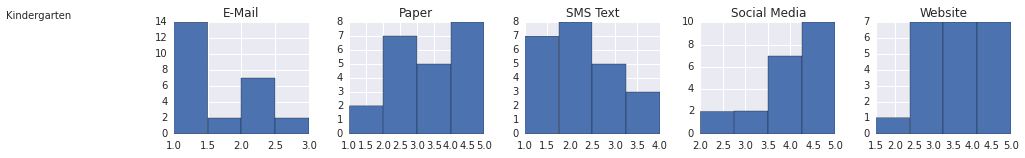

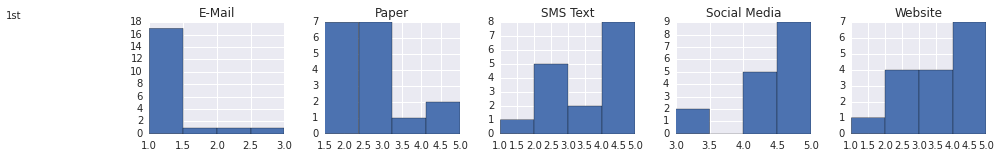

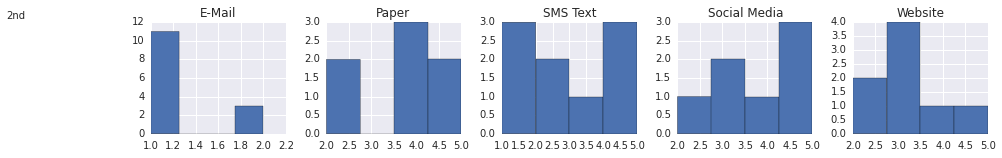

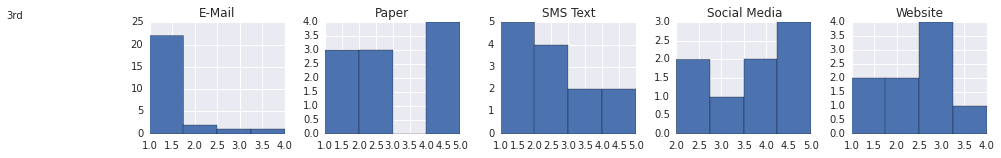

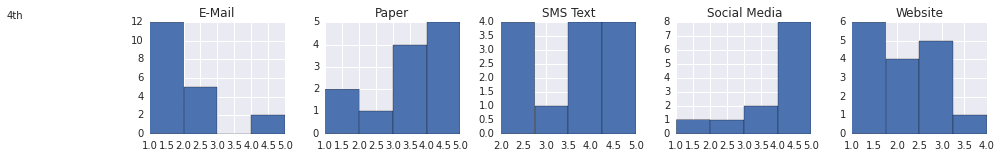

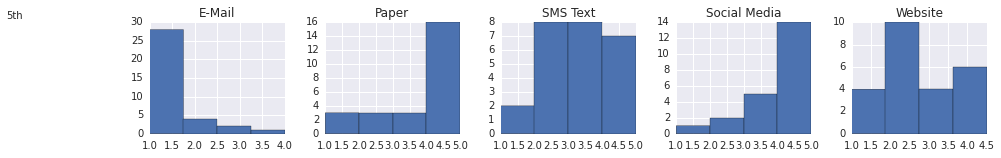

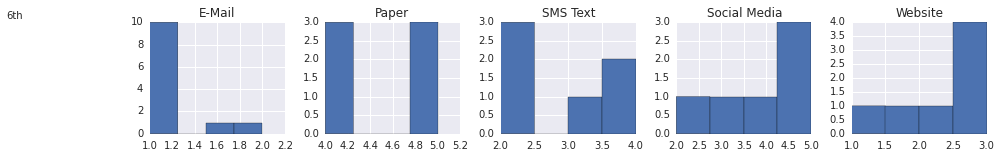

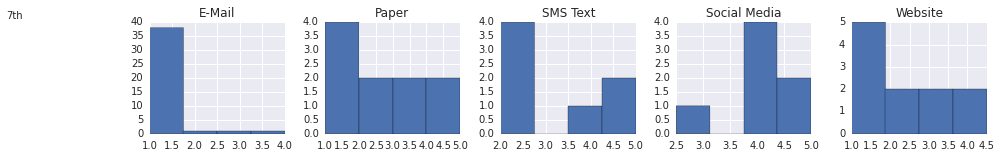

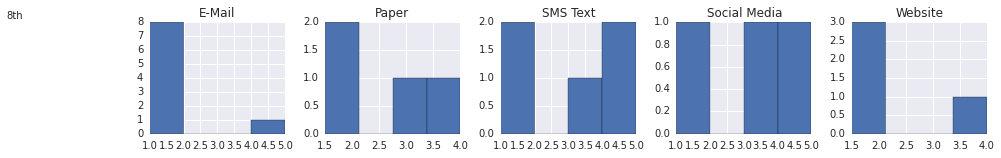

In [88]:
for grade in ['Kindergarten', '1st', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th']:
    y = data[data[grade] ==1][["Website","E-Mail","Paper","Social Media",'SMS Text']]
    plt.figure()
    y.hist(bins=4, layout = (1,5), figsize=(15, 2))
    plt.suptitle(grade, x=0)